<a href="https://colab.research.google.com/github/Alireza499/California_Housing/blob/main/ML_californiaHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **included librarys:**

In [ ]:
! pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## **Dataset:   california_housing**

In [ ]:
from sklearn.datasets import fetch_california_housing

## **fetch dataset and converting to pandas dataframes according to dataset help guid**
:
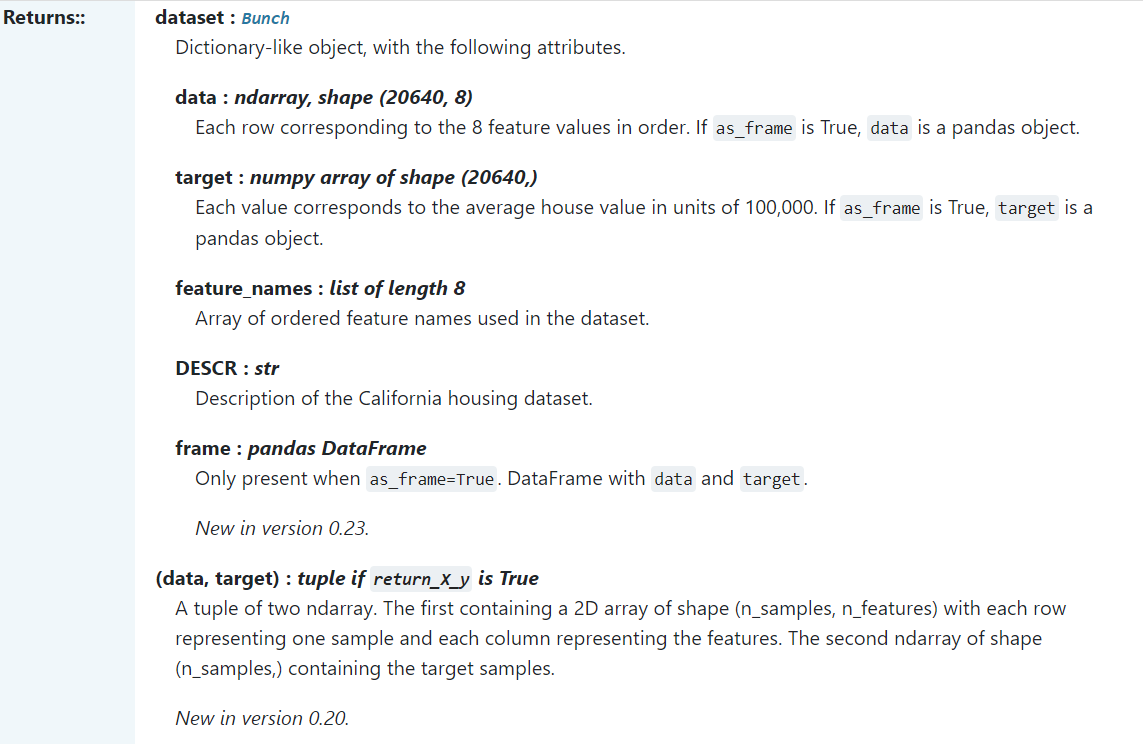

In [ ]:
Dataset = fetch_california_housing()
californiaHousing_df = pd.DataFrame(Dataset.data, columns=Dataset.feature_names)    # creating pandas dataFrames for this dataset
californiaHousing_df[Dataset.target_names[0]] = Dataset.target                                       # adding target to same dataframe
californiaHousing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
californiaHousing_df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

## **renaming features colums:**

In [ ]:
californiaHousing_df = californiaHousing_df.rename(columns={'MedInc':'MedInc', 'HouseAge':'Age','AveRooms':'Rooms','AveBedrms':'BedRooms','Population':'pop','MedHouseVal':'Value'})
californiaHousing_df

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### **select a random selection of dataset for proccssing purposes**

In [ ]:

CalHous_sample =californiaHousing_df.sample(frac = 0.2)   #chosing randomly 20 percent of dataset
CalHous_sample

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude,Value
3757,1.9866,30.0,3.786822,1.023256,736.0,2.852713,34.19,-118.38,1.774
17232,2.8750,43.0,4.779468,1.182510,671.0,2.551331,34.43,-119.69,2.806
15140,5.1185,15.0,6.202091,1.033101,1757.0,3.060976,32.85,-116.89,1.853
19099,4.0962,33.0,6.130802,1.054852,677.0,2.856540,38.25,-122.62,1.702
2314,6.9405,17.0,7.166667,1.009615,992.0,3.179487,36.88,-119.71,1.652
...,...,...,...,...,...,...,...,...,...
205,2.0375,48.0,4.944606,1.154519,1481.0,4.317784,37.79,-122.23,1.225
15955,3.8583,52.0,5.085890,0.987730,1086.0,3.331288,37.71,-122.45,2.616
12678,4.3288,23.0,6.065217,0.934783,1407.0,3.058696,38.55,-121.38,1.337
7397,1.6597,36.0,3.890110,0.989011,1136.0,4.161172,33.96,-118.23,1.091


## **Realizing Data:**




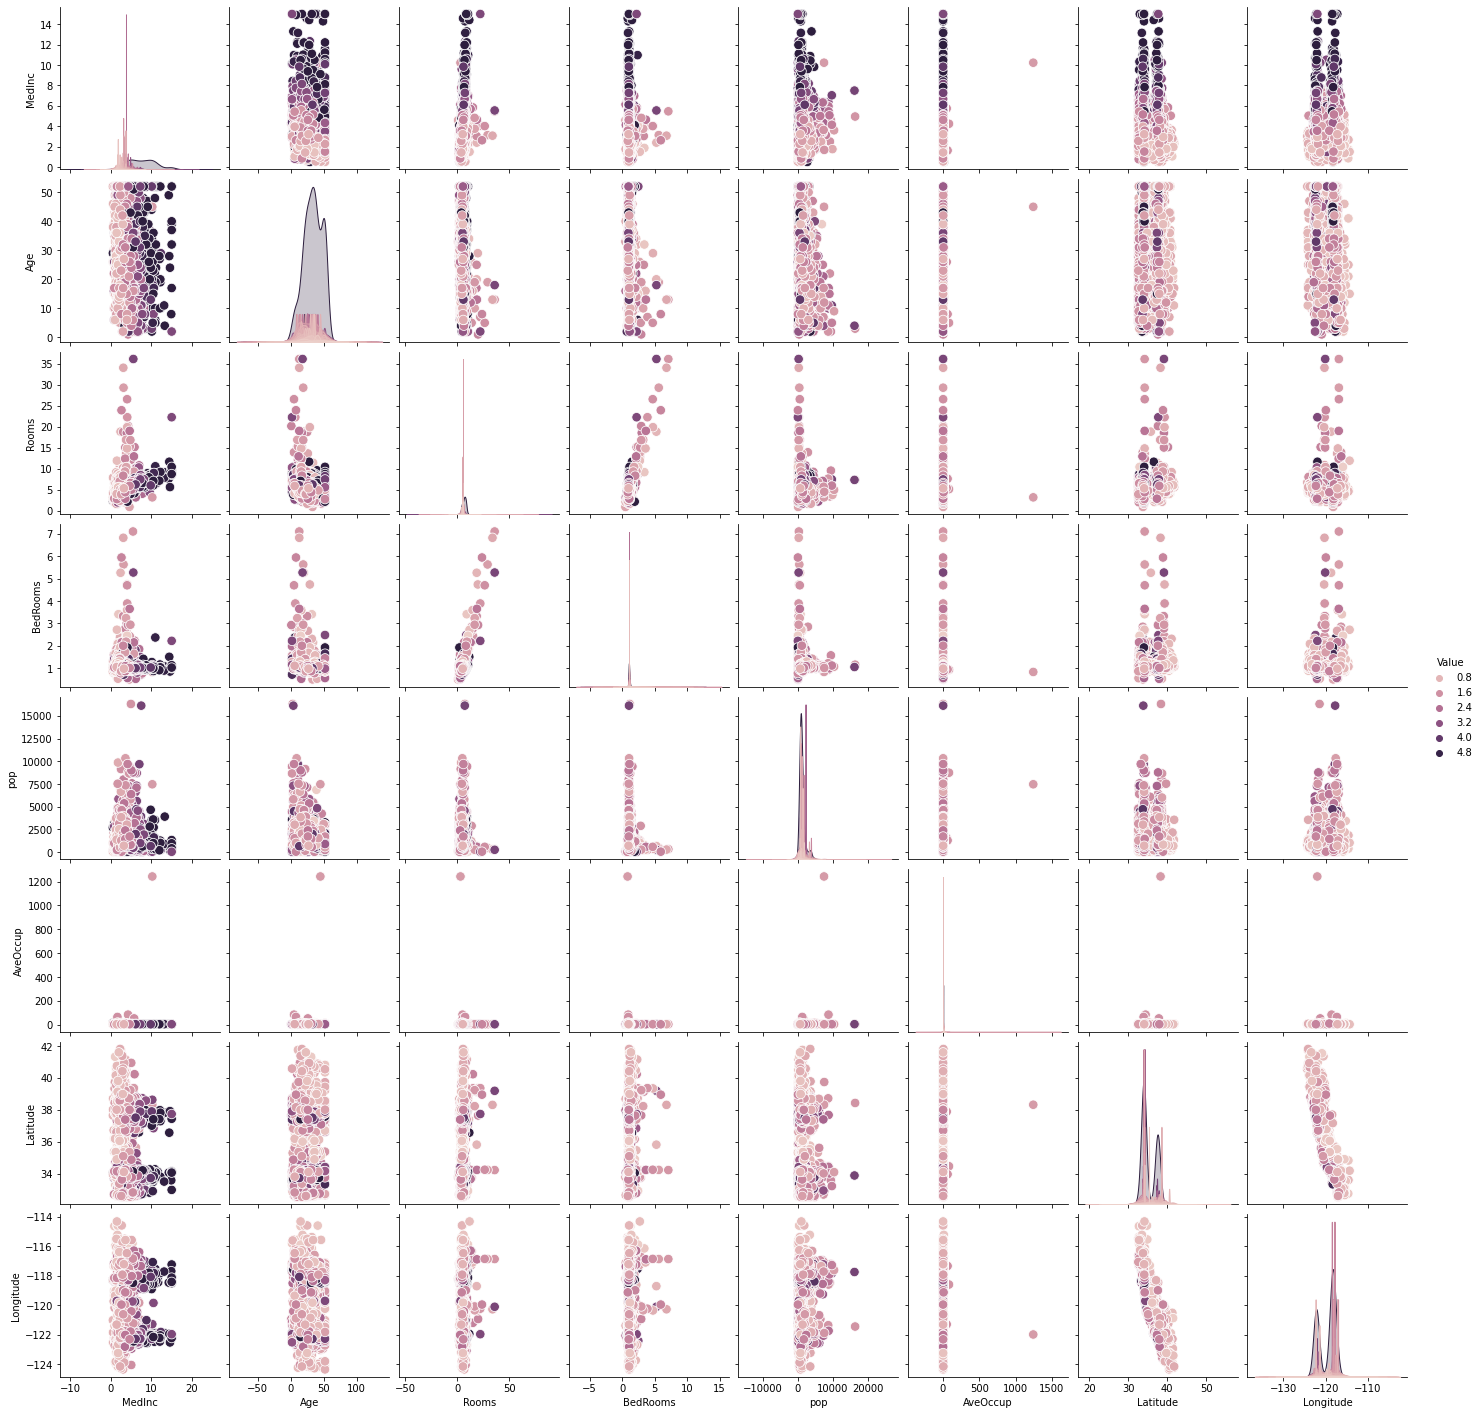

In [ ]:
sb.pairplot(CalHous_sample, hue='Value', plot_kws={'s':90})

### So far it seems **MedInc** and **Age** have the higher infuluance on determining the **value** of houses.

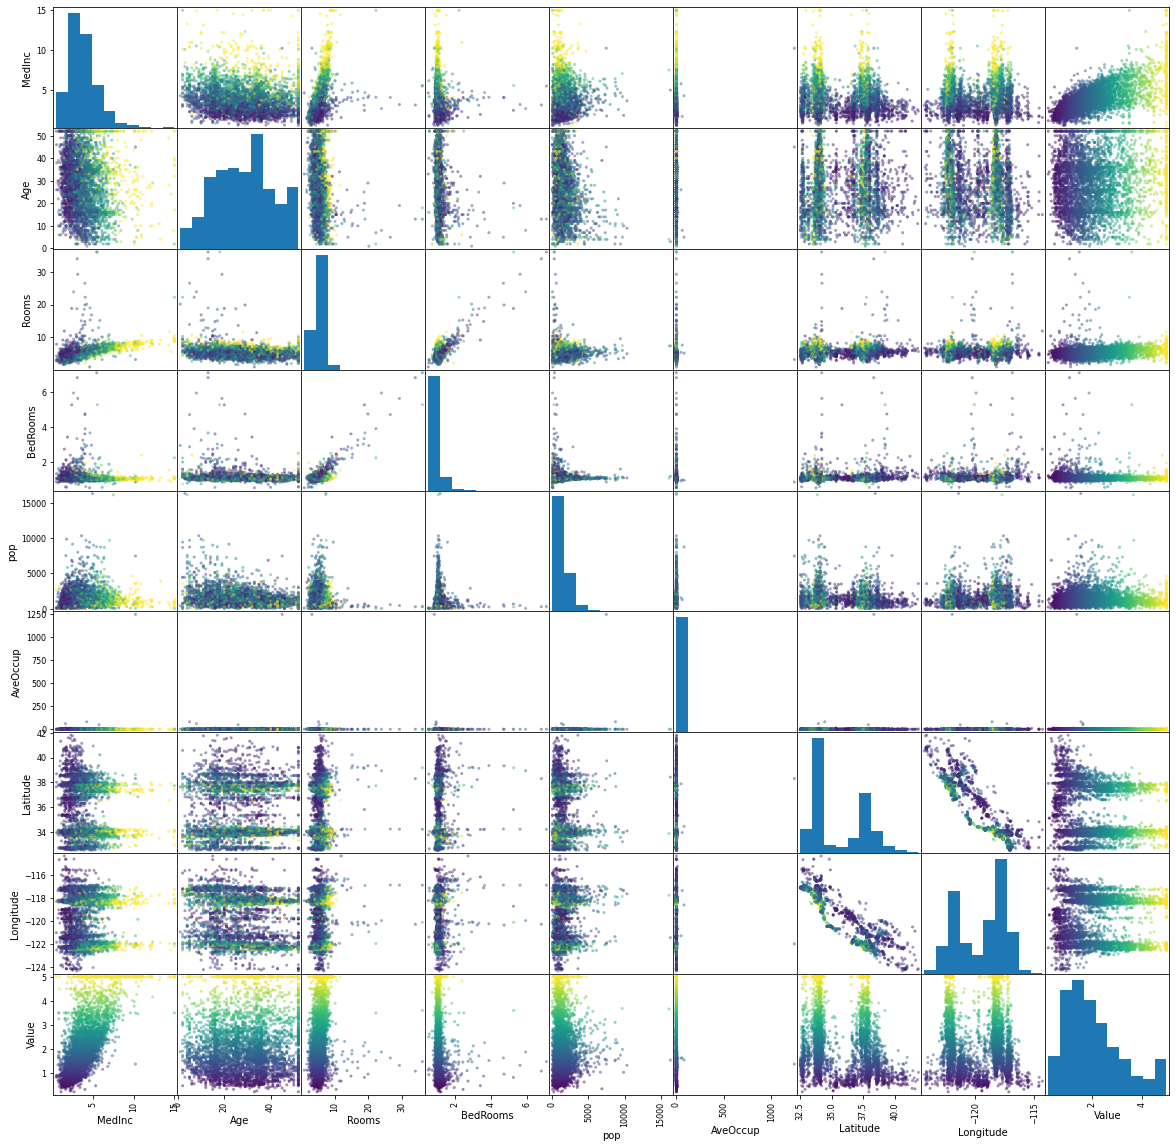

In [ ]:
pd.plotting.scatter_matrix(CalHous_sample, c=CalHous_sample['Value'], figsize=(20, 20));

### obviously **rooms** and **bedrooms** have a **linear** realationship
so we can probebly remove one of them without losing too much data

# **PreProccessing**

## check for **NOT A Number (NAN)** in dataset

In [ ]:
californiaHousing_df.isnull().sum()

MedInc       0
Age          0
Rooms        0
BedRooms     0
pop          0
AveOccup     0
Latitude     0
Longitude    0
Value        0
dtype: int64

We have no Nan in our dataset so we are good to go.

## Normalazing
### scale

### StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**fit**

In [ ]:
scaler.fit(californiaHousing_df)

StandardScaler()

**transform**

In [ ]:
californiaHousing_df_scaled = scaler.transform(californiaHousing_df)
# we need to conver this numpy array back to panda dataframe with same indexes and columns.
californiaHousing_df_scaled = pd.DataFrame(californiaHousing_df_scaled,index=californiaHousing_df.index,columns=californiaHousing_df.columns)
californiaHousing_df_scaled

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude,Value
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [ ]:
californiaHousing_df.describe()

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude,Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
californiaHousing_df_scaled.describe()

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude,Value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


we dont need target to be scaled so we change that column back.

In [ ]:
californiaHousing_df_scaled['Value'] = californiaHousing_df['Value']
californiaHousing_df_scaled

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude,Value
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847


# **Outliers**

## *Box*

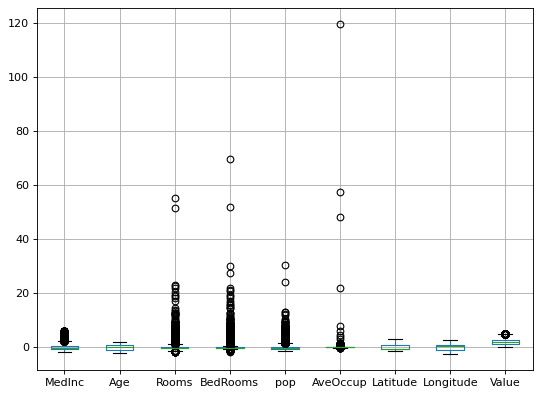

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
californiaHousing_df_scaled.boxplot()
plt.show()

its might be better to delete the outliers from our dataset.

two ways to do it:

In [ ]:
californiaHousing_df_scaled = californiaHousing_df_scaled[californiaHousing_df_scaled.AveOccup < 20]
#californiaHousing_df_scaled = californiaHousing_df_scaled[californiaHousing_df_scaled.pop <20]
californiaHousing_df_scaled = californiaHousing_df_scaled[californiaHousing_df_scaled.BedRooms<20]
californiaHousing_df_scaled = californiaHousing_df_scaled[californiaHousing_df_scaled.Rooms < 20]

### *OR:*

In [ ]:
indexes = californiaHousing_df_scaled[   (californiaHousing_df_scaled['AveOccup'] >= 20)
                                          | (californiaHousing_df_scaled['pop'] >= 20)
                                          | (californiaHousing_df_scaled['BedRooms'] >= 20)
                                          | (californiaHousing_df_scaled['Rooms'] >= 20)].index
californiaHousing_df_scaled.drop(indexes , inplace=True)

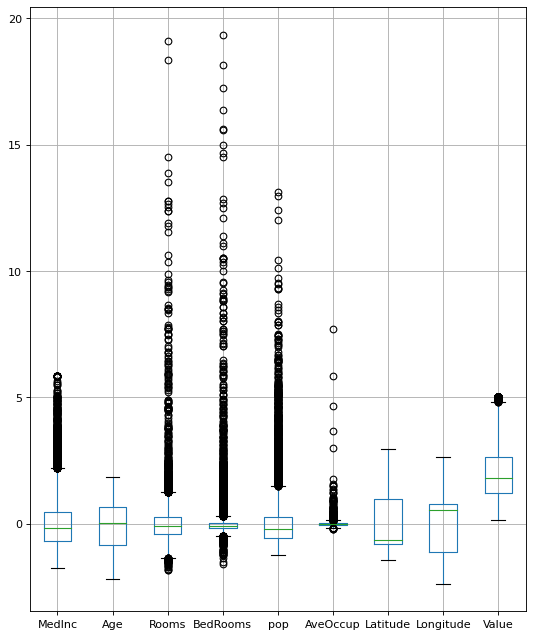

In [ ]:
plt.figure(figsize=(8, 10), dpi=80)
californiaHousing_df_scaled.boxplot()
plt.show()

# ?

In [ ]:
# import numbers

In [ ]:

# print(isinstance(californiaHousing_df_scaled['AveOccup'][29], numbers.Number))

In [ ]:
# californiaHousing_df_scaled['AveOccup'].isnull().sum()  # not a nan

# for x in californiaHousing_df_scaled['AveOccup']:
#   if not isinstance(x, numbers.Number):
#     print(x)                                          #all of them consider to be a number


# indexes = californiaHousing_df_scaled[(californiaHousing_df_scaled['pop'] >= 20) ]
# indexes

dividing Target and Fetures

In [ ]:
Target =  californiaHousing_df_scaled['Value']
Fetures = californiaHousing_df_scaled.drop(['Value'],axis=1)


In [ ]:
Target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Value, Length: 20626, dtype: float64

In [ ]:
Fetures

,MedInc,Age,Rooms,BedRooms,pop,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


## **Create and choosing the model**

# This problem is a ***supervised Regression*** problem.

split the dataset:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Fetures, Target, test_size=0.25, random_state=42)

## ***linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train, y_train)

LinearRegression()

# **visualaysing**

Text(0, 0.5, 'Value')

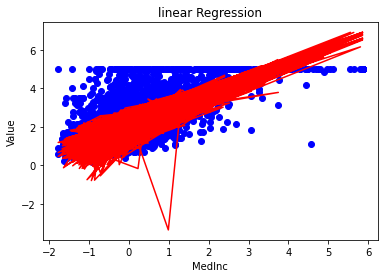

In [ ]:
plt.plot(X_test['MedInc'] , lin.predict(X_test), color = 'red')
plt.scatter(X_test['MedInc'], y_test, color = 'blue')
plt.title('linear Regression')
plt.xlabel('MedInc')
plt.ylabel('Value')

## **Score:**

In [ ]:
lin.score(X_train,y_train)

0.6259344436318769

In [ ]:
lin.score(X_test,y_test)

0.6315072660252627

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_test_predict3 = lin.predict(X_test)

rmse_score_lin = np.sqrt(mean_squared_error(y_test, y_test_predict3))
print("rmse_test :{}".format(rmse_score_lin) )

rmse_test :0.7019787959914987


## ***Polynomial Regression***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

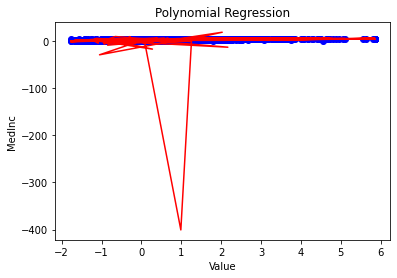

In [ ]:
plt.scatter(X_test['MedInc'], y_test, color = 'blue')

plt.plot(X_test['MedInc'], lin2.predict(poly.fit_transform(X_test)), color = 'red')

plt.title('Polynomial Regression')
plt.xlabel('Value')
plt.ylabel('MedInc')

plt.show()

# ***score***

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_test_predict = lin2.predict(poly.fit_transform(X_test))

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("rmse_test :{}".format(rmse_test) )
print("r2_test :{}".format(r2_test) )

rmse_test :5.670315284384829
r2_test :-23.04337088131644


In [ ]:
lin2.score(poly.fit_transform(X_test),y_test)

-23.04337088131644

####overfitting couse us to lose accuracy

## ***RandomForestRegressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressorForest = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressorForest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## **visualizing:**

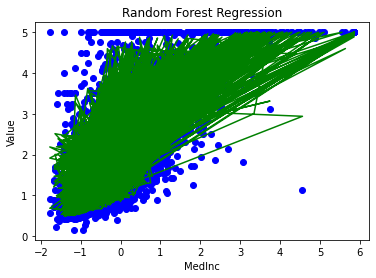

In [ ]:
# Scatter plot for original data
plt.scatter(X_test['MedInc'], y_test, color = 'blue')

# plot predicted data
plt.plot(X_test['MedInc'], regressorForest.predict(X_test),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('MedInc')
plt.ylabel('Value')
plt.show()

# ***score***

In [ ]:
regressorForest.score(X_test,y_test)

0.7974259906553882

In [ ]:
y_test_predict2 = regressorForest.predict(X_test)

rmse_score_RF = np.sqrt(mean_squared_error(y_test, y_test_predict2))
print("rmse_test :{}".format(rmse_score_RF) )

rmse_test :0.5204768187936862


## ***BayesianRidge*** (naiveBayes And ridge regression)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge

In [ ]:
nb = BayesianRidge()
nb.fit(X_train, y_train)

BayesianRidge()

In [ ]:
nb.score(X_test,y_test)

0.631466335376941

In [ ]:
y_test_predict1 = nb.predict(X_test)

rmse_score_nb = np.sqrt(mean_squared_error(y_test, y_test_predict1))
print("rmse_test :{}".format(rmse_score_nb) )


rmse_test :0.7020177813591233


## **K FOLD CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
#lin = LinearRegression()
kf=KFold(n_splits=5)
score=cross_val_score(lin, Fetures, Target, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.5877521  0.51209949 0.52724512 0.55424063 0.6824272 ]
Average Cross Validation score :0.5727529074650296


## **Stratified K-Fold Cross-Validation**

https://www.projectpro.io/recipes/explain-stratified-k-fold-cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []


We have simply built a regressor model with LogisticRegression with default values. Now for StratifiedKFold, we have kept n_splits to be 10, dividing our dataset for 10 times. Also, the shuffling is kept to be True.

In [ ]:
for train_index, test_index in skf.split(Fetures, Target):
    X_train_fold, X_test_fold = Fetures[train_index], Fetures[test_index]
    y_train_fold, y_test_fold = Target[train_index], Target[test_index]
    model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(X_test_fold, y_test_fold))

ValueError: ignored

skf.split has divided our model into 10 random index set. We have then fit our model at each set and thereby calculated accuracy score.

In [ ]:
print('Maximum Accuracy',max(lst_accu_stratified))
print('Minimum Accuracy:',min(lst_accu_stratified))
print('Overall Accuracy:',mean(lst_accu_stratified))

NameError: ignored

# **ENSEMBLES**

## a- *Bagging*

## b- *Boosting*

# Bagging:
such as randomForest

- BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
#lin = linearRegrission

model = BaggingRegressor(base_estimator = lin,
                          n_estimators = 1000,
                          random_state = 123)

In [ ]:
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=1000,
                 random_state=123)

In [ ]:
model.score(X_test,y_test)

0.6322518816498772

# **Boostin:**

- XGBoost (eXtreme Gradient Boosting)

this is more advance and faster version of gradian Boost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()   #try loading the model from xgbModel.json
xgb_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

code above takes 3 hours to run 😀 this is a calissifier so not sutable for this problem.

for more efficiency usage we should try Dimensity Reduction

In [ ]:
xgb_model.score(X_test,y_test) #its not a regression lerning

ValueError: ignored

In [ ]:
y_test_predict = xgb_model.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_score = r2_score(y_test, y_test_predict)

print("rmse_test :{}".format(rmse_score) )
print("r2_test :{}".format(r2_score) )

rmse_test :0.97818963674252
r2_test :0.2844713040021074


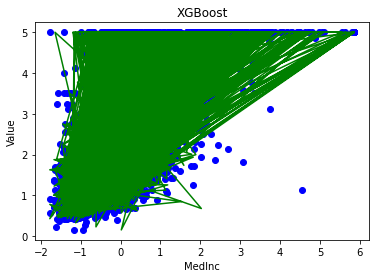

In [ ]:
# Scatter plot for original data
plt.scatter(X_test['MedInc'], y_test, color = 'blue')

plt.plot(X_test['MedInc'], y_test_predict,
         color = 'green')
plt.title('XGBoost')
plt.xlabel('MedInc')
plt.ylabel('Value')
plt.show()

In [ ]:
np.savetxt('data.csv', y_test_predict, delimiter=',')

saving the model:

In [ ]:
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('xgbModel.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xgb_model.save_model('xgbModel.json')

#xgb_model.load_model("xgbModel.json")

In [ ]:
# for faster result try this but as a python code it`s in R
# xgb_model <- train(x = trainX, y = xtrain$loss, method = "xgbTree", eta=1, max.depth=2)

In [ ]:
# Scatter plot for original data
plt.scatter(X_test['MedInc'], y_test, color = 'blue')

plt.plot(X_test['MedInc'], y_test_predict,
         color = 'green')
plt.title('XGBoost')
plt.xlabel('MedInc')
plt.ylabel('Value')
plt.show()

Mounted at /content/gdrive


- XGBoost (eXtreme Gradient Boosting)

this is more advance and faster version of gradian Boost

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
XGBReg_model = xgb.XGBRegressor(n_estimators=1000,max_depth=10)
XGBReg_model.fit(X_train, y_train)

[09:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=10, n_estimators=1000)

In [ ]:
XGBReg_model.score(X_test,y_test)

0.8313086213535643

In [ ]:

y_test_predict = XGBReg_model.predict(X_test)

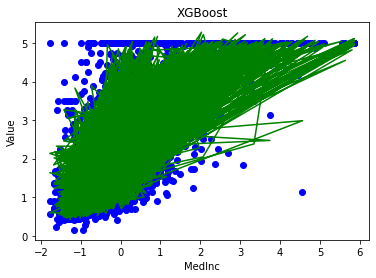

In [ ]:
# Scatter plot for original data
plt.scatter(X_test['MedInc'], y_test, color = 'blue')

plt.plot(X_test['MedInc'], y_test_predict,
         color = 'green')
plt.title('XGBoost')
plt.xlabel('MedInc')
plt.ylabel('Value')
plt.show()

In [ ]:
rmse_score = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_score = r2_score(y_test, y_test_predict)

print("rmse_test :{}".format(rmse_score) )
print("r2_test :{}".format(r2_score) )

rmse_test :0.47495883799834593
r2_test :0.8313086213535643


## **conclusion**

we were able to bild a model with **83 percent score** and 0.47 root mean square error using  **XGBoost (eXtreme Gradient Boosting)** method.

simpler models such as linear regression and BayesianRidge (naiveBayes And ridge regression) scored around 63.

for this problem it`s best to use **bagging** and **boosting** algorithms.

Random forest which is a bagging algorithms was ablle to score around 80 percent accuracy with n_estimators = 100.
we could enhance this randomForest model with more preprossing the data and using other values for n_estimators = 100.

It was also possible to get better result if we use more data as train data.

summary:

In [ ]:
print("XGBoost - RMSE(mean_squared_error) :      {}".format(rmse_score) )
print("")
print("BayesianRidge - RMSE(mean_squared_error) :     {}".format(rmse_score_nb) )
print("")
print("regressorForest - RMSE(mean_squared_error) :     {}".format(rmse_score_RF) )
print("regressorForest - Score :      {}".format(regressorForest.score(X_test,y_test)))
print("")
print("linearRegression - RMSE(mean_squared_error):     {}".format(rmse_score_lin) )
print("linearRegression - Score       :{}".format(lin.score(X_test,y_test)))

XGBoost - RMSE(mean_squared_error) :      0.47495883799834593

BayesianRidge - RMSE(mean_squared_error) :     0.7020177813591233

regressorForest - RMSE(mean_squared_error) :     0.5204768187936862
regressorForest - Score :      0.7974259906553882

linearRegression - RMSE(mean_squared_error):     0.7019787959914987
linearRegression - Score       :0.6315072660252627
